In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [47]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if(logs.get('loss') < 0.01):
            print("\n Reached 99% accuracy so cancelling training")
            self.model.stop_training = True
            
callback = myCallback()

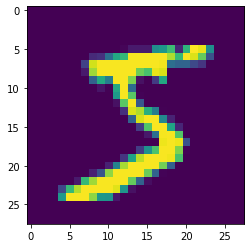

5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

In [38]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])
print(x_train[0])

In [39]:
x_train = x_train/255.0
x_test = x_test/255.0

In [60]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [61]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [62]:
model.fit(x_train,y_train,epochs = 10, callbacks = [callback])

Epoch 1/10
60000/60000 [==============================] - 21s 343us/sample - loss: 0.8382 - acc: 0.7886
Epoch 2/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.3628 - acc: 0.8986
Epoch 3/10
46240/60000 [======================>.......] - ETA: 4s - loss: 0.3137 - acc: 0.9101

KeyboardInterrupt: 

In [46]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 227us/sample - loss: 0.1747 - acc: 0.9481


[0.17470586334615945, 0.9481]